<a href="https://colab.research.google.com/github/ishanks06/MachineLearning/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import itertools

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

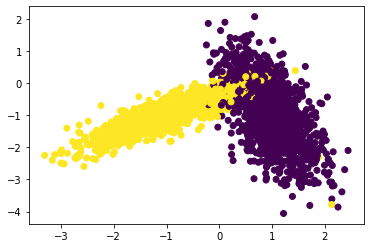

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [15]:
X_train[:1]

array([[ 0.45267141, -1.42381257]])

In [0]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  trainscores = []
  testscores = []
  b = []
  data = []
  result = []
  index= []
  totallen = 0
  testscores_folds=[]
  train_len = len(x_train)
  ##this loop is to divide the training data into multiple fold
  for i in range(0, folds):
      if i != (folds - 1):
          b = x_train[totallen:totallen + int(train_len / folds)]
          c = y_train[totallen:totallen + int(train_len / folds)]
          totallen = totallen + len(b)
          data.append(b)
          result.append(c)
  b = x_train[totallen:train_len]
  c = y_train[totallen:train_len]
  data.append(b)
  result.append(c)
  ## saving the original copy of folded data into a variable
  x = data.copy()
  y = result.copy()
  ## executing for each value of hyperparameter - k
  for k in range(param_range[0],param_range[1]):
    score_trainfolds = []
    score_cvfolds = []

    #for each fold we are taking 1 fold as CV monotonically and other 2 as data 
    for cv in range(0, folds):
        data = x.copy()
        result = y.copy()
        traindata = []
        resultdata = []
        cvdata = []
        cvresult = []

        cvdata = data[cv]
        cvresult = result[cv]

        data.pop(cv)
        result.pop(cv)

        train_set = np.vstack(data)
        result_set = list(itertools.chain.from_iterable(result))

        classifier.n_neighbors = k
        classifier.fit(train_set,result_set)

        Y_trainpredicted = classifier.predict(train_set)
        score_trainfolds.append(accuracy_score(result_set,Y_trainpredicted))

        Y_cvpredicted = classifier.predict(cvdata)
        score_cvfolds.append(accuracy_score(cvresult,Y_cvpredicted))
    trainscores.append(np.mean(np.array(score_trainfolds)))
    testscores.append(np.mean(np.array(score_cvfolds)))
  return trainscores,testscores

In [0]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

In [0]:
param = (1,30)

In [0]:
trainscore,testscore = RandomSearchCV(X_train,y_train,neigh,param,9)

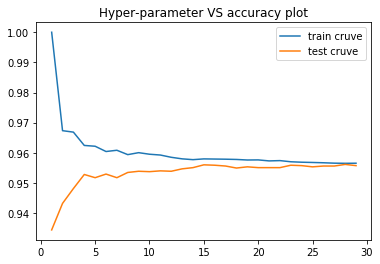

In [35]:
plt.plot(list(range(param[0],param[1])),trainscore, label='train cruve')
plt.plot(list(range(param[0],param[1])),testscore, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

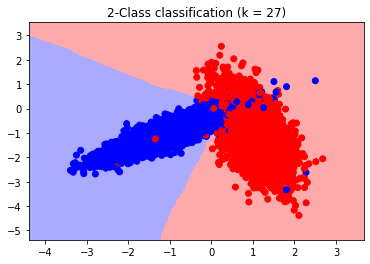

In [40]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 27)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>